# Data Analysis

## Fit.ly Customer Churn Analysis

Identify behavioral patterns associated with churn risk and engagement using the assembled customer-level dataset.

In [70]:
# Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [71]:
# Ingest Clean Data:

final_df = pd.read_csv("../data/processed/fitly_customer_features.csv")
final_df.head()

# dataset is the merged cleaned raw file

,customer_id,email,state,plan,plan_list_price,churn_status,user_id,total_tickets,avg_resolution_time,event_count,ticket_count
0,C10000,user10000@example.com,New Jersey,Enterprise,105,Y,10000,3.0,21.446667,3.0,3.0
1,C10001,user10001@example.net,Louisiana,Basic,22,Y,10001,4.0,17.542500,1.0,4.0
2,C10002,user10002@example.net,Oklahoma,Basic,24,NaN,10002,3.0,6.433333,1.0,3.0
3,C10003,user10003@example.com,Michigan,Free,0,NaN,10003,1.0,2.190000,1.0,1.0
4,C10004,user10004@example.com,Texas,Enterprise,119,NaN,10004,4.0,8.542500,4.0,4.0


In [72]:
print(final_df.shape)
final_df.isna().mean()

# The final dataset contains one row per customer with engineered engagement and support features

(400, 11)


customer_id            0.0000
email                  0.0000
state                  0.0000
plan                   0.0000
plan_list_price        0.0000
churn_status           0.7150
user_id                0.0000
total_tickets          0.0825
avg_resolution_time    0.0000
event_count            0.0000
ticket_count           0.0000
dtype: float64

## Labled Customers:

In [74]:
# labeled customers only

labeled = final_df[final_df["churn_status"].notna()]
labeled["churn_status"].value_counts()

# N: 286
# Y: 114
# Total: 400
# we have 114 customers who churned 29%
# & 71% who stayed

churn_status
Y    114
Name: count, dtype: int64

## Engagement vs Churn:

In [80]:
# Replace NaN in churn_status with 'N'

final_df["churn_status"] = final_df["churn_status"].fillna("N")

labeled = final_df[final_df["churn_status"].notna()]
labeled["churn_status"].value_counts()

churn_status
N    286
Y    114
Name: count, dtype: int64

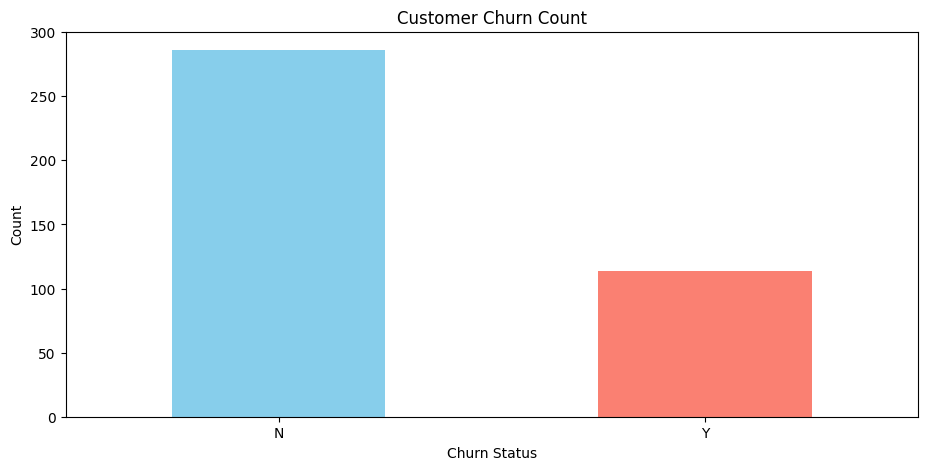

In [156]:
# Bar chart

plt.figure(figsize=(11, 5))
labeled["churn_status"].value_counts().plot(kind='bar',
                                            color=['skyblue', 'salmon'], 
                                            rot=0
)

plt.title("Customer Churn Count")
plt.ylabel("Count")
plt.xlabel("Churn Status")
plt.show()

# nearly 29% of customers churned - substantial lossof customer revenue

In [123]:
labeled.head()

,customer_id,email,state,plan,plan_list_price,churn_status,user_id,total_tickets,avg_resolution_time,event_count,ticket_count
0,C10000,user10000@example.com,New Jersey,Enterprise,105,Y,10000,3.0,21.446667,3.0,3.0
1,C10001,user10001@example.net,Louisiana,Basic,22,Y,10001,4.0,17.542500,1.0,4.0
2,C10002,user10002@example.net,Oklahoma,Basic,24,N,10002,3.0,6.433333,1.0,3.0
3,C10003,user10003@example.com,Michigan,Free,0,N,10003,1.0,2.190000,1.0,1.0
4,C10004,user10004@example.com,Texas,Enterprise,119,N,10004,4.0,8.542500,4.0,4.0


In [118]:
# labeled churn mean

labeled.groupby("churn_status")["event_count"].mean()

# we have like avg churn event counts 0.36 for chuened custoners
# while we have approximately 1.41 event  significantly higher avg for non churned customers
# this suggest a strong inverse correlation with highly engaged users 
# - N: 1.41 (Higher average engagement indicates these users interact with the product/service more frequently)
# - Y: 0.36 (	Much lower engagement suggests infrequent use is a major predictor of customer attrition)

churn_status
N    1.412587
Y    0.359649
Name: event_count, dtype: float64

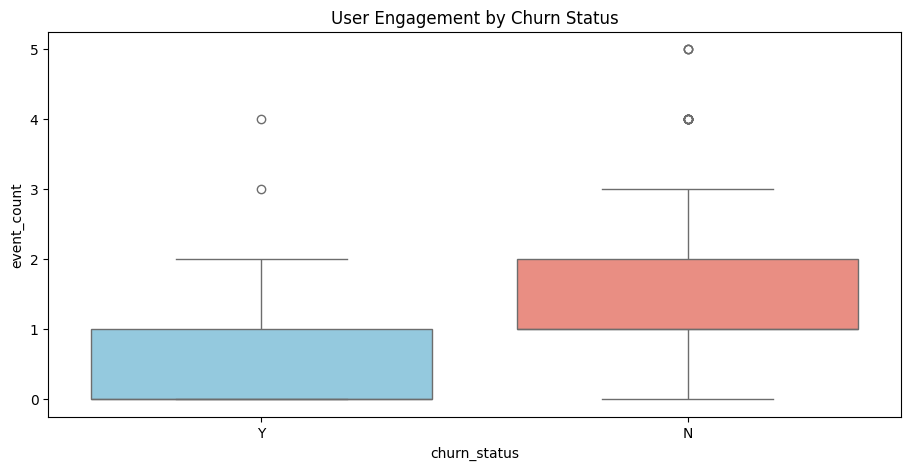

In [162]:
# boxplot: churn stats

plt.figure(figsize=(11, 5))
sns.boxplot(
    data=labeled,
    x="churn_status",
    y="event_count",
    hue="churn_status",
    palette=['skyblue', 'salmon']
    # hue=
)

plt.title("User Engagement by Churn Status")
plt.show()

# N is centered higher on the event count axis, meaning higher median and overall range of engagement
# Y on th otherhand is quite low and is close to 0, showing majority churned users have very few event counts
# Low engagement is a major churn risk signal

## Plan Classification Types vs Churn:

In [66]:
# Plan categories:

pd.crosstab(
    labeled["plan"],
    labeled["churn_status"],
    normalize="index"
)

# Free: 41% churn
# Paid plans: 22–26% churn
# thsi contex makes free plans tend to churn more often than paid ones

churn_status,N,Y
plan,,
Basic,0.762712,0.237288
Enterprise,0.739130,0.260870
Free,0.590476,0.409524
Pro,0.776471,0.223529


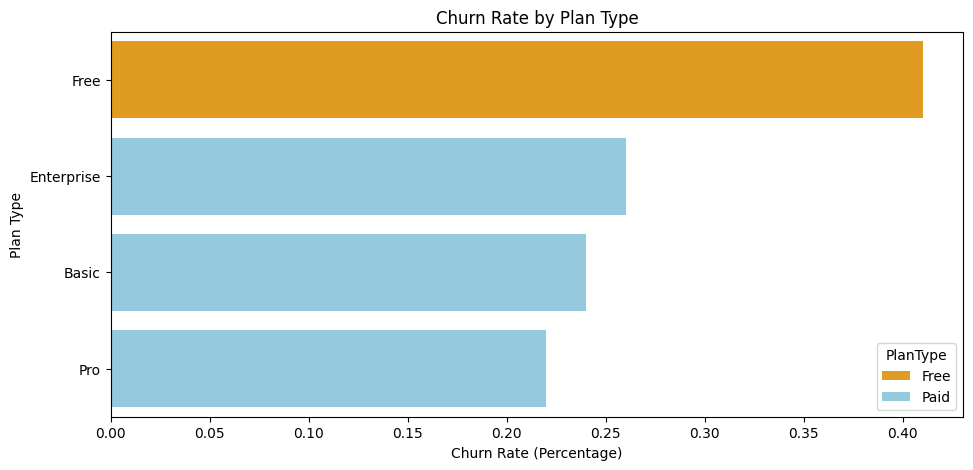

In [161]:
# Plan categories showing the most churn amongst the group:

# dict
data = {'Plan': ['Basic', 'Enterprise', 'Free', 'Pro'],
        'Churn Rate': [0.24, 0.26, 0.41, 0.22]}
# df
df_viz = pd.DataFrame(data)

# hue
df_viz['PlanType'] = (
    df_viz['Plan'].apply(lambda x: 'Free' if x == 'Free' else 'Paid')
)

# the bar
plt.figure(figsize=(11, 5))
sns.barplot(
    x='Churn Rate',
    y='Plan',
    hue='PlanType', # new column color
    data=df_viz.sort_values('Churn Rate', ascending=False),
    palette={'Free': 'orange', 'Paid': 'skyblue'}, # custom color
    dodge=False # Ensures bars are side-by-side
)

plt.title('Churn Rate by Plan Type')
plt.xlabel('Churn Rate (Percentage)')
plt.ylabel('Plan Type')
plt.show()

Churn rates are higher among Free plan users, suggesting lower initial commitment. However, behavioral signals such as engagement and support usage provide stronger churn separation than plan type alone.

## Support Usage vs Churn

In [114]:
# Ticket Volume:

labeled.groupby("churn_status")["ticket_count"].mean()

# N mean ticket: 2.23 (Retained)
# Y mean ticket: 2.45  (Churned)
# this means that the churned customers (Y) has opened slightly more support tickets on avg: 2.45 
# while the retained(N) has opened avg of 2.23

churn_status
N    2.234266
Y    2.447368
Name: ticket_count, dtype: float64

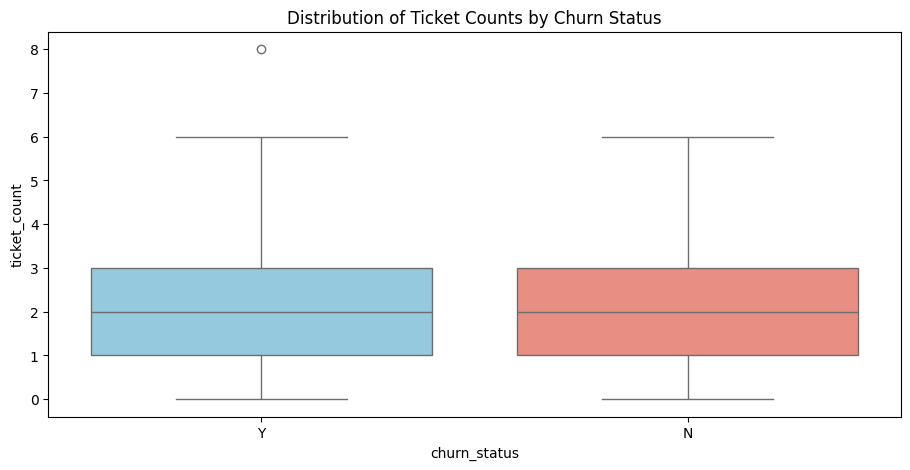

In [157]:
# Distribution of Ticket

plt.figure(figsize=(11, 5))
sns.boxplot(data=labeled, 
            x="churn_status", 
            y="ticket_count",
            hue="churn_status",
            palette=['skyblue', 'salmon']
)
# sns.boxplot(
#     data=labeled,
#     x="churn_status",
#     y="event_count",
#     hue="churn_status",
#     palette=['skyblue', 'salmon']
#     # hue=
# )
plt.title("Distribution of Ticket Counts by Churn Status")
plt.show()

# results looks identical due to Mean difference is small in absolute terms
# - meaning Y & N difference of Difference: ~0.21 tickets
# this one here gives weak signals coz Churned users open slightly more tickets on average
# this also means that ticket count alone is not a strong separator of churn vs retention
# Support usage has weak univariate discriminative power

<Axes: xlabel='churn_status', ylabel='ticket_count'>

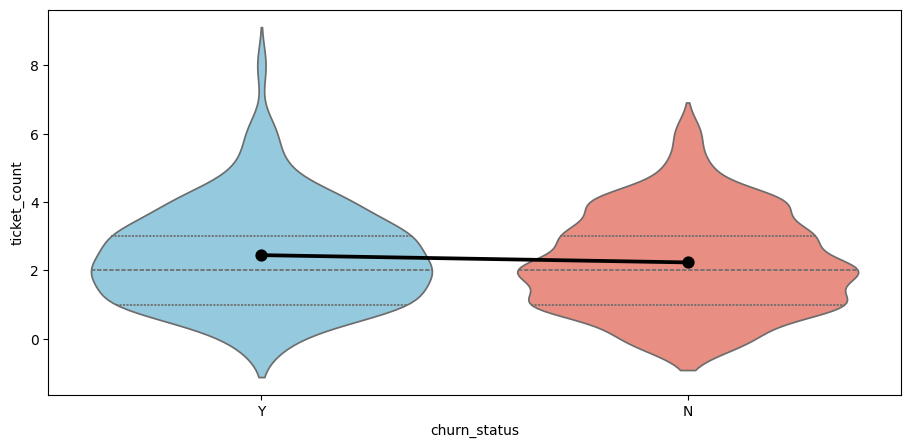

In [158]:
# Using an alternative data visualizations to drive clearer inisghts and understanding

plt.figure(figsize=(11, 5))
sns.violinplot(
    data=labeled,
    x="churn_status",
    y="ticket_count",
    inner="quartile",
    hue="churn_status",
    palette=['skyblue', 'salmon']
)

sns.pointplot(
    data=labeled,
    x="churn_status",
    y="ticket_count",
    color="black",
    errorbar=None
)

# the outershape of the instrument: this is the kde, it shows probability debsity of the datapoints at different values
# - wider body of the instrument indicates concentration of tickets created
# - while the narrower sections of the instrument indicates less/fewer number of tickets created
# The Box and its lines, functions same as a regular boxplot
# teh black dot embodies the median of the number of iickets created per group (Y, N)
# The thic Black lines represents the diff in angluar formation showing gradual difference (tht couldnt be shown with boxplot)
# - this represents the IQR which is whee the middle 50% of the group tickets values are
# Thin balck lines: are called the whiskers same as boxplot, extending showing the max & min values of the 2 groups
# Similar median, indicates that the typical customer has a very similar number of support tickets regardless of whether they churned or stayed.
# Difference in density and shapes apear quite similar for both groups 
# - This suggests that the overall distribution of ticket counts is largely the same for both churned and retained customers.
# ticket_count may not be a strong predictor
# - The visual similarity of both distributions suggests the variable doesn't highly correlate with churn in this dataset. 


## Resolution Time vds Churn:

In [61]:
# Resolution Time:

labeled.groupby("churn_status")["avg_resolution_time"].mean()

# N mean avg resolution time is 6.00
# Y mean avg resolution time is 17.87
# quite large differnece of 11.87 
# Y(17.87) is substantially higher than for N(6.80)
# - This difference of nearly 12 hours is stark and statistically evident
# - indicating that Churned customers experience substantially longer resolution times, indicating higher support friction
# - Long resolution times may reflect operational friction contributing to customer dissatisfaction

churn_status
N     6.007807
Y    17.867949
Name: avg_resolution_time, dtype: float64

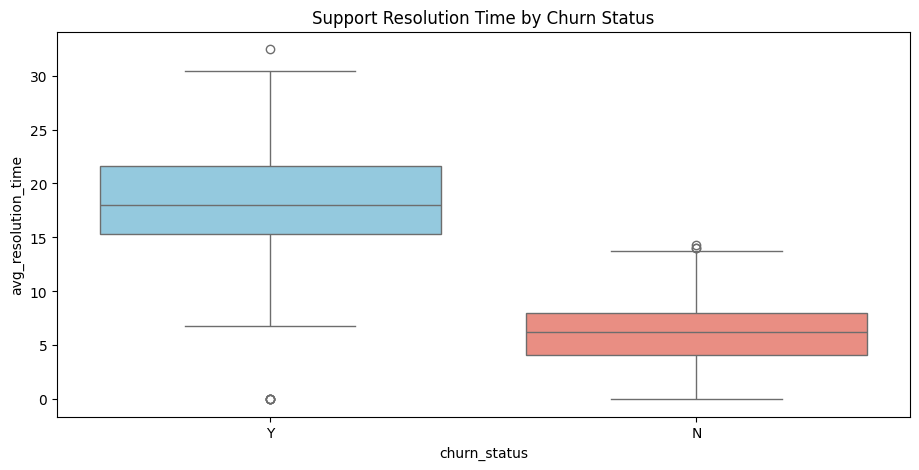

In [159]:
# Resolution Time:

plt.figure(figsize=(11, 5))
sns.boxplot(
    data=labeled,
    x="churn_status",
    y="avg_resolution_time",
    hue="churn_status",
    palette=['skyblue', 'salmon']
)

plt.title("Support Resolution Time by Churn Status")
plt.show()

# the visualizations effectively highlight the significant difference in avg support resolution times between customers groups(Y, N)
# it is shown here that churned customers are quite largeer in terms of values when itcomes to resolution time
# the mean value of churned customers are too massive that the highest value of retained customers wouldnt reach it
# Assumptions: poor server as chirn driver
# - pattern can suggest that the supporrt process itself might be the point of friction
# not to mention that hrs to resolve the issue is quite outrageously high
# Support friction (not volume) is strongly associated with churn

## Risk Signals:

In [137]:
# segmentation:

final_df["low_engagement"] = final_df["event_count"] <= 1
final_df["high_support"] = final_df["ticket_count"] >= 3

# behavioral risk signals:
# Low engagement: user barely uses the product
# High support: user needs help frequently

# what make us use 1 & 3 as thereshold for this analysis:
# Low engagement(event_count <= 1):
# EDA Median event_count ≈ 2 where 25% oof users have 1 event as the least value count overall while max is 5
# - we need the least that is 1 so low engagement <= 1
# High support usage (ticket_count >= 3):
# EDA meaian ticket count is 2 with 75% of users = <=3 so ticket_count >=3
# - meaning users who contact support more frequently than the typical customer
# the values of 1 & 3 are more easier to explain than anyother values coz we have reference and basis to use them as threshold
# therefore i can clearly say that these threshold are datadriven and interpretable and grounded by observed values

In [138]:
# segmentation:

pd.crosstab(
    [final_df["low_engagement"], final_df["high_support"]], 
    final_df["churn_status"],
    margins=True  # Adds a 'Total' row and column
)

# ill only check Y and its total for this analysis (N doesnt make sense at this point)
# segment1: low engagement = False & high support = false (Churn rate = 5 / 76 ≈ 6.6%) = healthiest cohort
# segment2: low engagement = False & high support = true (Churn rate = 2 / 58 ≈ 3.4%) = Engagement serves as a buffer
# segment3: low engagement = true & high support = false (Churn rate = 58 / 160 ≈ 36.3%) = major risk!!
# segment4: low engagement = true & high support = true (Churn rate = 49 / 106 ≈ 46.2%) = Highest risk segment!!

# because Ticket count alone is weak / Ticket count + engagement made it strong

churn_status                   N    Y  All
low_engagement high_support               
False          False          71    5   76
               True           56    2   58
True           False         102   58  160
               True           57   49  106
All                          286  114  400

In [140]:
# contingency table for segmentation:

churn_table = pd.crosstab(
    [final_df["low_engagement"], final_df["high_support"]], 
    final_df["churn_status"],
    margins=True  # Adds a 'Total' row and column
)

# churn rate
churn_table['Churn Rate (%)'] = (churn_table['Y'] / churn_table['All'] * 100).round(1)

# Display the updated table with the churn rates
print(churn_table)

# Engagement moderates support friction.
# Support volume becomes a risk signal only when engagement is low.

churn_status                   N    Y  All  Churn Rate (%)
low_engagement high_support                               
False          False          71    5   76             6.6
               True           56    2   58             3.4
True           False         102   58  160            36.2
               True           57   49  106            46.2
All                          286  114  400            28.5


Churn is strongly associated with low engagement.
Support ticket volume alone shows weak separation, but when combined with engagement, it becomes a powerful risk signal.
Customers with both low engagement and high support needs exhibit the highest churn rate (~46%).

Customers who show both low engagement and frequent support usage exhibit substantially higher churn incidence than other users

The highest churn risk appears among customers who disengage early while simultaneously experiencing higher-than-average support friction.

## Data Analysis Summary:

Exploratory and segmented analysis indicates that event_count (user engagement) is the strongest behavioral indicator of churn. Churned customers exhibit significantly lower engagement levels compared to retained users.

Ticket volume shows weak univariate separation between churned and retained customers. However, when combined with engagement metrics, ticket volume becomes informative. Customers with low engagement (≤1 event) and high support usage (≥3 tickets) demonstrate the highest churn rates.

Support resolution time displays a large and consistent gap between churned and retained customers, suggesting that prolonged issue resolution is a key contributor to customer attrition.

Thresholds used for segmentation are data-driven and grounded in observed distribution statistics, ensuring interpretability and analytical validity. Overall, churn risk increases sharply when low engagement and support friction co-occur.

---

### Metric to Monitor:

##### Primary Metric: Early Engagement Rate
- Early Engagement Rate = % of new customers who perform more than 1 activity event within their initial usage period.

##### Why this metric?
- analysis shows event_count is the strongest churn separator
- Users with event_count ≤ 1 account for:
    - 36% churn (low engagement alone)
    - 46% churn when combined with high support
- Engagement clearly precedes retention

##### How the business should monitor it:
- Track weekly or monthly
- the comapny can segment by:
    - Plan type (Free vs Paid)
    - Support interaction presence
- the company can monitor this and flag if the rate drops below baseline

##### Initial baseline value (from your data):
- Median event_count ≈ 2
- 25% of users have only 1 event

##### Baseline estimate:
- 75% of users reach more than 1 event
- Early Engagement Rate ≈ 75%

we can estimate the initial values for the metric based on current data to used as metric baseline for us to follow

---

### My Recommeendations:

##### Recommendation 1: Prioritize Early Engagement Activation
- Introduce onboarding nudges and guided actions within the first user sessions
- Focus on encouraging at least two meaningful actions (workout tracking or content interaction)

Why:
- Users with event_count ≤ 1 show 3–7× higher churn risk
- Engagement acts as a protective buffer, even for users with support issues

Expected impact:
- Reduce early disengagement
- Lower churn among Free and new users

##### Recommendation 2: Escalate Support Resolution for Low-Engagement Users & Long resulution time
- Flag users who are both:
    - Low engagement (event_count ≤ 1)
    - High support usage (ticket_count ≥ 3)
- Prioritize faster resolution for this segment
- also flag and escalate long resiolution time, and work on improving 1st engagement resolution protocol
    - this is a strategy where if a customer calls first time with an issue at hand we work on addressing and resolving it on first engagement rather than let then contact customer service continiously to resolve their issues
    - iinstead of letting customers stay on the line, ask for their infor and best time to call and solve their concenrns offthe phone and make a call back if needed wwith a supervisor to let them know that their issues are addressed and make them feel seen and wanted that we care for them and we prioritize them and their concern

Why:
- This group has the highest observed churn rate (~46%)
- Churned users experience nearly 3× longer support resolution times

Expected impact:
- Reduce friction during critical early usage
- Prevent churn driven by unresolved frustration


##### Final Summary:
- Customer churn is strongly driven by early disengagement
- Users who perform one or fewer activity events exhibit significantly higher churn, particularly when combined with frequent support interactions.
- Support ticket volume alone is not a strong churn indicator; however, prolonged resolution times materially increase churn risk
- To mitigate churn, the business should monitor Early Engagement Rate as a leading indicator and focus on driving early product usage while prioritizing and improving on fast support resolution for disengaged users.

  
---